In [38]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from wordcloud import WordCloud, STOPWORDS
import plotly.express as px
import plotly.graph_objects as go

# Data Read

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print('Data read into a pandas dataframe')

Data read into a pandas dataframe


In [3]:
df

lsoa_code     borough               major_category  \
0         E01001116     Croydon                     Burglary   
1         E01001646   Greenwich  Violence Against the Person   
2         E01000677     Bromley  Violence Against the Person   
3         E01003774   Redbridge                     Burglary   
4         E01004563  Wandsworth                      Robbery   
...             ...         ...                          ...   
13490599  E01000504       Brent              Criminal Damage   
13490600  E01002504  Hillingdon                      Robbery   
13490601  E01004165      Sutton                     Burglary   
13490602  E01001134     Croydon                      Robbery   
13490603  E01003413      Merton  Violence Against the Person   

                       minor_category  value  year  month  
0         Burglary in Other Buildings      0  2016     11  
1                      Other violence      0  2016     11  
2                      Other violence      0  2015      5  
3         Burglary in Other Buildings      0  2016      3  
4                   Personal Property      0  2008      6  
...                               ...    ...   ...    ...  
13490599  Criminal Damage To Dwelling      0  2015      2  
13490600            Personal Property      1  2015      6  
13490601       Burglary in a Dwelling      0  2011      2  
13490602            Business Property      0  2011      5  
13490603                 Wounding/GBH      0  2015      6  

[13490604 rows x 7 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Data Pre-processing

In [5]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Interpretasi : Karena tidak ada missing value pada dataset ini, maka dapat dilanjutkan pada pengolahan selanjutnya, yaitu Visualisasi Data.

In [6]:
df.groupby(['value']).size()

value
0      10071505
1       2141789
2        712478
3        275501
4        119483
         ...   
281           1
286           1
288           1
300           1
309           1
Length: 247, dtype: int64

In [7]:
df.groupby(['borough']).size()

borough
Barking and Dagenham      311040
Barnet                    572832
Bexley                    385668
Brent                     490644
Bromley                   523908
Camden                    378432
City of London              9720
Croydon                   602100
Ealing                    549396
Enfield                   511164
Greenwich                 421200
Hackney                   417744
Hammersmith and Fulham    328752
Haringey                  413856
Harrow                    365688
Havering                  399600
Hillingdon                442584
Hounslow                  395928
Islington                 359208
Kensington and Chelsea    296784
Kingston upon Thames      259524
Lambeth                   519048
Lewisham                  485136
Merton                    339876
Newham                    471420
Redbridge                 445716
Richmond upon Thames      304128
Southwark                 483300
Sutton                    322488
Tower Hamlets             412128
Wa

In [8]:
df2 = df[df['value']>=1]
df2

lsoa_code               borough               major_category  \
9         E01004177                Sutton           Theft and Handling   
16        E01000086  Barking and Dagenham           Theft and Handling   
24        E01001301                Ealing           Theft and Handling   
25        E01001794               Hackney  Violence Against the Person   
32        E01000733               Bromley              Criminal Damage   
...             ...                   ...                          ...   
13490581  E01000789               Bromley  Violence Against the Person   
13490584  E01003301              Lewisham  Violence Against the Person   
13490590  E01001679             Greenwich           Theft and Handling   
13490592  E01033327              Lewisham  Violence Against the Person   
13490600  E01002504            Hillingdon                      Robbery   

                            minor_category  value  year  month  
9              Theft/Taking of Pedal Cycle      1  2016      8  
16                      Other Theft Person      1  2009      5  
24                      Other Theft Person      2  2012      1  
25                              Harassment      1  2013      2  
32        Criminal Damage To Motor Vehicle      1  2016      4  
...                                    ...    ...   ...    ...  
13490581                        Harassment      3  2009     12  
13490584               Assault with Injury      1  2015     10  
13490590     Theft/Taking Of Motor Vehicle      1  2012      4  
13490592                    Common Assault      2  2013      7  
13490600                 Personal Property      1  2015      6  

[3419099 rows x 7 columns]

In [22]:
df2.loc[df2['borough']=='Barking and Dagenham', 'X'] = 51.5541
df2.loc[df2['borough']=='Barnet', 'X'] = 51.6050
df2.loc[df2['borough']=='Bexley', 'X'] = 51.4519
df2.loc[df2['borough']=='Brent', 'X'] = 51.5673
df2.loc[df2['borough']=='Bromley', 'X'] = 51.4060
df2.loc[df2['borough']=='Camden', 'X'] = 51.5390
df2.loc[df2['borough']=='City of London', 'X'] = 51.5072
df2.loc[df2['borough']=='Croydon', 'X'] = 51.3770
df2.loc[df2['borough']=='Ealing', 'X'] = 51.5133
df2.loc[df2['borough']=='Enfield', 'X'] = 51.6523
df2.loc[df2['borough']=='Greenwich', 'X'] = 51.4934
df2.loc[df2['borough']=='Hackney', 'X'] = 51.5734
df2.loc[df2['borough']=='Hammersmith and Fulham', 'X'] = 51.4990
df2.loc[df2['borough']=='Haringey', 'X'] = 51.5906
df2.loc[df2['borough']=='Harrow', 'X'] = 51.5806
df2.loc[df2['borough']=='Havering', 'X'] = 51.5779
df2.loc[df2['borough']=='Hillingdon', 'X'] = 51.5352
df2.loc[df2['borough']=='Hounslow', 'X'] = 51.4609
df2.loc[df2['borough']=='Islington', 'X'] = 51.5386
df2.loc[df2['borough']=='Kensington and Chelsea', 'X'] = 51.4991
df2.loc[df2['borough']=='Kingston upon Thames', 'X'] = 51.4123
df2.loc[df2['borough']=='Lambeth', 'X'] = 51.4935
df2.loc[df2['borough']=='Lewisham', 'X'] = 51.4612
df2.loc[df2['borough']=='Merton', 'X'] = 51.4098
df2.loc[df2['borough']=='Newham', 'X'] = 51.5255
df2.loc[df2['borough']=='Redbridge', 'X'] = 51.5886
df2.loc[df2['borough']=='Richmond upon Thames', 'X'] = 51.4990
df2.loc[df2['borough']=='Southwark', 'X'] = 51.5028
df2.loc[df2['borough']=='Sutton', 'X'] = 51.5072
df2.loc[df2['borough']=='Tower Hamlets', 'X'] = 51.5203
df2.loc[df2['borough']=='Waltham Forest', 'X'] = 51.5886
df2.loc[df2['borough']=='Wandsworth', 'X'] = 51.4584
df2.loc[df2['borough']=='Westminster', 'X'] = 51.4975

df2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8832\1436119663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['borough']=='Barking and Dagenham', 'X'] = 51.5541


lsoa_code               borough               major_category  \
9         E01004177                Sutton           Theft and Handling   
16        E01000086  Barking and Dagenham           Theft and Handling   
24        E01001301                Ealing           Theft and Handling   
25        E01001794               Hackney  Violence Against the Person   
32        E01000733               Bromley              Criminal Damage   
...             ...                   ...                          ...   
13490581  E01000789               Bromley  Violence Against the Person   
13490584  E01003301              Lewisham  Violence Against the Person   
13490590  E01001679             Greenwich           Theft and Handling   
13490592  E01033327              Lewisham  Violence Against the Person   
13490600  E01002504            Hillingdon                      Robbery   

                            minor_category  value  year  month        X  
9              Theft/Taking of Pedal Cycle      1  2016      8  51.5072  
16                      Other Theft Person      1  2009      5  51.5541  
24                      Other Theft Person      2  2012      1  51.5133  
25                              Harassment      1  2013      2  51.5734  
32        Criminal Damage To Motor Vehicle      1  2016      4  51.4060  
...                                    ...    ...   ...    ...      ...  
13490581                        Harassment      3  2009     12  51.4060  
13490584               Assault with Injury      1  2015     10  51.4612  
13490590     Theft/Taking Of Motor Vehicle      1  2012      4  51.4934  
13490592                    Common Assault      2  2013      7  51.4612  
13490600                 Personal Property      1  2015      6  51.5352  

[3419099 rows x 8 columns]

In [23]:
df2.loc[df2['borough']=='Barking and Dagenham', 'Y'] = -0.1340
df2.loc[df2['borough']=='Barnet', 'Y'] = -0.2076
df2.loc[df2['borough']=='Bexley', 'Y'] = -0.1543
df2.loc[df2['borough']=='Brent', 'Y'] = -0.2711
df2.loc[df2['borough']=='Bromley', 'Y'] = -0.0132
df2.loc[df2['borough']=='Camden', 'Y'] = -0.1426
df2.loc[df2['borough']=='City of London', 'Y'] = -0.1276
df2.loc[df2['borough']=='Croydon', 'Y'] = -0.0957
df2.loc[df2['borough']=='Ealing', 'Y'] = -0.3043
df2.loc[df2['borough']=='Enfield', 'Y'] = -0.0807
df2.loc[df2['borough']=='Greenwich', 'Y'] = -0.0098
df2.loc[df2['borough']=='Hackney', 'Y'] = -0.0724
df2.loc[df2['borough']=='Hammersmith and Fulham', 'Y'] = -0.2291
df2.loc[df2['borough']=='Haringey', 'Y'] = -0.1110
df2.loc[df2['borough']=='Harrow', 'Y'] = -0.3420
df2.loc[df2['borough']=='Havering', 'Y'] = -0.2121
df2.loc[df2['borough']=='Hillingdon', 'Y'] = -0.4481
df2.loc[df2['borough']=='Hounslow', 'Y'] = -0.3731
df2.loc[df2['borough']=='Islington', 'Y'] = -0.1028
df2.loc[df2['borough']=='Kensington and Chelsea', 'Y'] = -0.1933
df2.loc[df2['borough']=='Kingston upon Thames', 'Y'] = -0.3007
df2.loc[df2['borough']=='Lambeth', 'Y'] = -0.1178
df2.loc[df2['borough']=='Lewisham', 'Y'] = -0.0073
df2.loc[df2['borough']=='Merton', 'Y'] = -0.2108
df2.loc[df2['borough']=='Newham', 'Y'] = -0.0352
df2.loc[df2['borough']=='Redbridge', 'Y'] = -0.0824
df2.loc[df2['borough']=='Richmond upon Thames', 'Y'] = -0.3037
df2.loc[df2['borough']=='Southwark', 'Y'] = -0.0877
df2.loc[df2['borough']=='Sutton', 'Y'] = -0.1940
df2.loc[df2['borough']=='Tower Hamlets', 'Y'] = -0.0293
df2.loc[df2['borough']=='Waltham Forest', 'Y'] = -0.0118
df2.loc[df2['borough']=='Wandsworth', 'Y'] = -0.1891
df2.loc[df2['borough']=='Westminster', 'Y'] = -0.1357

df2

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8832\3713590610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[df2['borough']=='Barking and Dagenham', 'Y'] = -0.1340


lsoa_code               borough               major_category  \
9         E01004177                Sutton           Theft and Handling   
16        E01000086  Barking and Dagenham           Theft and Handling   
24        E01001301                Ealing           Theft and Handling   
25        E01001794               Hackney  Violence Against the Person   
32        E01000733               Bromley              Criminal Damage   
...             ...                   ...                          ...   
13490581  E01000789               Bromley  Violence Against the Person   
13490584  E01003301              Lewisham  Violence Against the Person   
13490590  E01001679             Greenwich           Theft and Handling   
13490592  E01033327              Lewisham  Violence Against the Person   
13490600  E01002504            Hillingdon                      Robbery   

                            minor_category  value  year  month        X  \
9              Theft/Taking of Pedal Cycle      1  2016      8  51.5072   
16                      Other Theft Person      1  2009      5  51.5541   
24                      Other Theft Person      2  2012      1  51.5133   
25                              Harassment      1  2013      2  51.5734   
32        Criminal Damage To Motor Vehicle      1  2016      4  51.4060   
...                                    ...    ...   ...    ...      ...   
13490581                        Harassment      3  2009     12  51.4060   
13490584               Assault with Injury      1  2015     10  51.4612   
13490590     Theft/Taking Of Motor Vehicle      1  2012      4  51.4934   
13490592                    Common Assault      2  2013      7  51.4612   
13490600                 Personal Property      1  2015      6  51.5352   

               Y  
9        -0.1940  
16       -0.1340  
24       -0.3043  
25       -0.0724  
32       -0.0132  
...          ...  
13490581 -0.0132  
13490584 -0.0073  
13490590 -0.0098  
13490592 -0.0073  
13490600 -0.4481  

[3419099 rows x 9 columns]

# Visualize Data

# Bar Chart Value of Major Category in UK 2008-2016

In [9]:
df2.groupby(['major_category']).size()

major_category
Burglary                        441209
Criminal Damage                 466268
Drugs                           231894
Fraud or Forgery                  2682
Other Notifiable Offences        80569
Robbery                         163549
Sexual Offences                   1075
Theft and Handling             1136994
Violence Against the Person     894859
dtype: int64

In [10]:
cat1 = df2[df2['major_category']=='Burglary']['value'].sum()
cat2 = df2[df2['major_category']=='Criminal Damage']['value'].sum()
cat3 = df2[df2['major_category']=='Drugs']['value'].sum()
cat4 = df2[df2['major_category']=='Fraud or Forgery']['value'].sum()
cat5 = df2[df2['major_category']=='Other Notifiable Offences']['value'].sum()
cat6 = df2[df2['major_category']=='Robbery']['value'].sum()
cat7 = df2[df2['major_category']=='Sexual Offences']['value'].sum()
cat8 = df2[df2['major_category']=='Theft and Handling']['value'].sum()
cat9 = df2[df2['major_category']=='Violence Against the Person']['value'].sum()

print("Burglary = ", cat1)
print("Criminal Damage = ", cat2)
print("Drugs = ", cat3)
print("Fraud or Forgery = ", cat4)
print("Other Notifiable Offences = ", cat5)
print("Robbery = ", cat6)
print("Sexual Offences = ", cat7)
print("Theft and Handling = ", cat8)
print("Violence Against the Person = ", cat9)

Burglary =  754293
Criminal Damage =  630938
Drugs =  470765
Fraud or Forgery =  5325
Other Notifiable Offences =  106349
Robbery =  258873
Sexual Offences =  1273
Theft and Handling =  2661861
Violence Against the Person =  1558081


In [11]:
maj_value = {
    'Major_Category' : ['Burglary', 'Criminal Damage', 'Drugs', 'Fraud or Forgery', 'Other Notifiable Offences', 'Robbery', 'Sexual Offences', 'Theft and Handling', 'Violence Against the Person'],
    'Total' : [754293, 630938, 470765, 5325, 106349, 258873, 1273, 2661861, 1558081]
}
result = pd.DataFrame(maj_value)

print(result)

                Major_Category    Total
0                     Burglary   754293
1              Criminal Damage   630938
2                        Drugs   470765
3             Fraud or Forgery     5325
4    Other Notifiable Offences   106349
5                      Robbery   258873
6              Sexual Offences     1273
7           Theft and Handling  2661861
8  Violence Against the Person  1558081


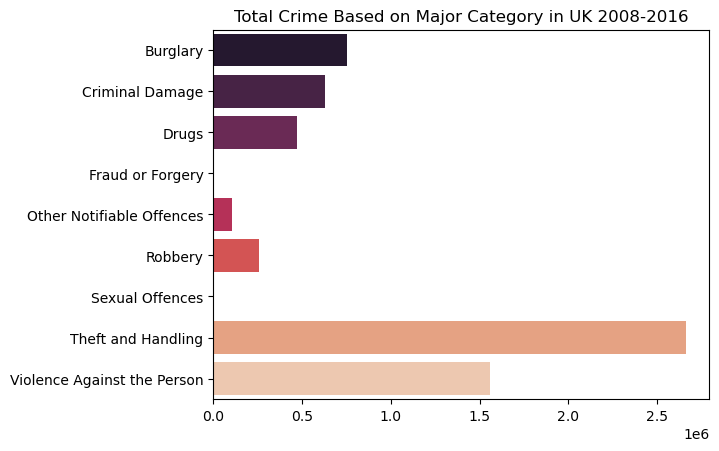

In [12]:
sns.barplot(data = maj_value, x = 'Total', y = 'Major_Category', palette='rocket')
plt.title('Total Crime Based on Major Category in UK 2008-2016')

plt.show()

Interpretasi : Dapat dilihat pada bar chat di atas bahwa terjadi kriminal paling banyak pada rentang tahun 2008 - 2016 adalah Theft and Handling. Untuk jenis kriminal paling sedikit adalah Sexual offences.

# Line Plot Crime 2008-2016 in UK

In [13]:
df2.groupby(['year']).size()

year
2008    391242
2009    383008
2010    379349
2011    378814
2012    377721
2013    364680
2014    370384
2015    381859
2016    392042
dtype: int64

In [14]:
year2008 = df2[df2['year']==2008]['value'].sum()
year2009 = df2[df2['year']==2009]['value'].sum()
year2010 = df2[df2['year']==2010]['value'].sum()
year2011 = df2[df2['year']==2011]['value'].sum()
year2012 = df2[df2['year']==2012]['value'].sum()
year2013 = df2[df2['year']==2013]['value'].sum()
year2014 = df2[df2['year']==2014]['value'].sum()
year2015 = df2[df2['year']==2015]['value'].sum()
year2016 = df2[df2['year']==2016]['value'].sum()

print("year2008 = ", year2008)
print("year2009 = ", year2009)
print("year2010 = ", year2010)
print("year2011 = ", year2011)
print("year2012 = ", year2012)
print("year2013 = ", year2013)
print("year2014 = ", year2014)
print("year2015 = ", year2015)
print("year2016 = ", year2016)

year2008 =  738641
year2009 =  717214
year2010 =  715324
year2011 =  724915
year2012 =  737329
year2013 =  686407
year2014 =  680183
year2015 =  711624
year2016 =  736121


In [15]:
df4 = {
    'Year' : [2008, 2009, 2010, 2011, 2012,2013, 2014, 2015, 2016],
    'Total' : [738641, 717214, 715324, 724915, 737329, 686407, 680183, 711624, 736121]
}
result = pd.DataFrame(df4)

print(result)

   Year   Total
0  2008  738641
1  2009  717214
2  2010  715324
3  2011  724915
4  2012  737329
5  2013  686407
6  2014  680183
7  2015  711624
8  2016  736121


Text(0.5, 1.0, 'Lineplot for Each Year Crime Cases in UK')

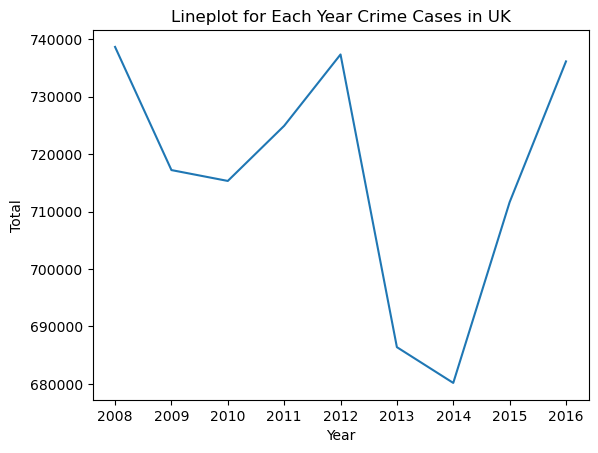

In [16]:
sns.lineplot(data = df4, x = 'Year', y = 'Total')
plt.title('Lineplot for Each Year Crime Cases in UK')

Interpretasi : Berdasarkan line plot di atas, dapat dilihat bahwa jumlah terjadinya kejahatan tiap tahun sangat fluktuatif. Jumlah kejahatan terbanyak yang terjadi dalam peridode satu tahun terjadi di tahun 2008 (738641 kasus). Sedangkan jumlah kejahatan yang paling sedikit terjadi dalam satu periode tahun terjadi di tahun 2014 (680183 kasus).

# Scatter Plot

Text(0.5, 1.0, 'Scatter Plot for Each Year Crime Cases in UK')

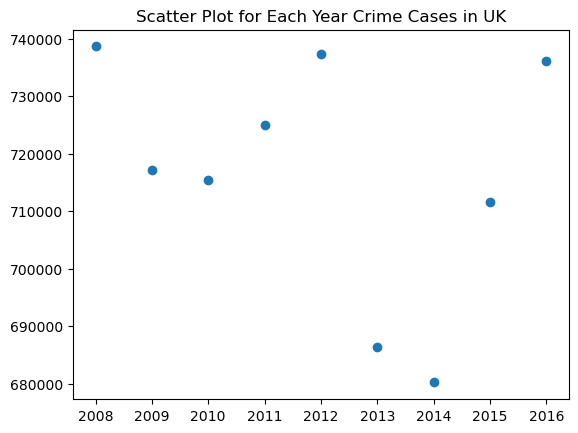

In [24]:
plt.scatter(data = df4, x = 'Year', y = 'Total')
plt.title('Scatter Plot for Each Year Crime Cases in UK')

Interpretasi : Scatter plot tidak cocok untuk digunakan pada dataset ini. Hal ini disebabkan scatter plot digunakan untuk mengetahui apakah sebuah variabel memiliki hubungan yang berbanding lurus atau justru berbanding terbalik. Pada dataset ini, variabel yang ada tidaklah cukup sehingga tidak cocok untuk memvisualisasikannya menggunakan scatter plot.

# Pie Chart of Total in Major Category

<AxesSubplot:ylabel='year'>

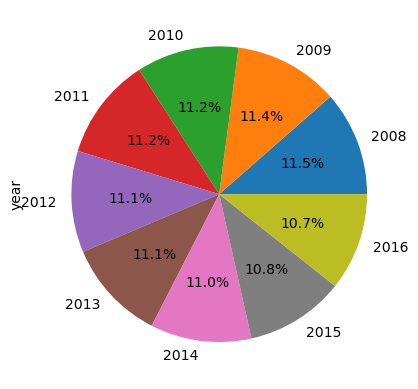

In [17]:
df2["year"].value_counts().plot.pie(labels=[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], autopct='%1.1f%%')

Interpretasi : Menurut saya, pie chat juga tidak cocok untuk digunakan pada dataset ini. Disebabkan terlalu banyak kategori, borough, dan tahun pada dataset ini. Menurut saya penggunaan pie chart ini akan cocok jika hanya menggunakan sedikit kategori (kurang dari 4). Sehingga, pembaca dapat langsung tahu perbedaan jumlahnya tanpa ada angka yang ditampilkan dengan hanya mengandalkan lebih luas daerah warna yang mana.

# Box Plot

<AxesSubplot:>

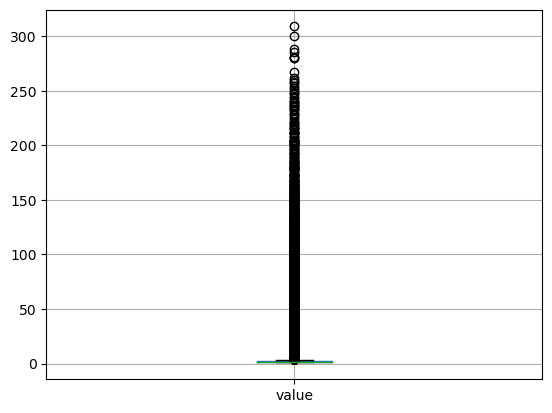

In [18]:
df2.boxplot(['value'])

Interpretasi : Box plot tidak bisa digunakan pada dataset ini. Hal ini disebabkan dataset yang digunakan tidak menggambarkan bentuk distribusi data (skewness). Sehingga tidak akan terbentuk boxnya.

# Folium Maps

In [25]:
df2.shape

(3419099, 9)

In [27]:
limit = 1000
df2_lim = df2.iloc[0:limit, :]

df2_lim.shape #saya limit datanya akrena evice saya tidak kuat

(1000, 9)

In [19]:
# London Latitude and Longtitude Values
latitude = 51.5072
longitude = -0.1276

In [20]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

london_map

In [28]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df2_lim.Y, df2_lim.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 1000,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

london_map.add_child(incidents)

In [29]:
incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df2_lim.Y, df2_lim.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius = 20,
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 1.0
        )
    )

latitudes = list(df2_lim.Y)
longitudes = list(df2_lim.X)
labels = list(df2_lim.major_category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)

london_map.add_child(incidents)

In [30]:
df2_lim.groupby(['borough']).size()

borough
Barking and Dagenham      23
Barnet                    35
Bexley                    16
Brent                     39
Bromley                   37
Camden                    35
Croydon                   50
Ealing                    44
Enfield                   34
Greenwich                 25
Hackney                   24
Hammersmith and Fulham    21
Haringey                  35
Harrow                    17
Havering                  22
Hillingdon                31
Hounslow                  32
Islington                 35
Kensington and Chelsea    27
Kingston upon Thames      12
Lambeth                   50
Lewisham                  43
Merton                    19
Newham                    35
Redbridge                 29
Richmond upon Thames      21
Southwark                 50
Sutton                    25
Tower Hamlets             34
Waltham Forest            35
Wandsworth                37
Westminster               28
dtype: int64

In [35]:
bor_1 = df2_lim[df2_lim['borough']=='Barking and Dagenham']['value'].sum()
bor_2 = df2_lim[df2_lim['borough']=='Barnet']['value'].sum()
bor_3 = df2_lim[df2_lim['borough']=='Bexley']['value'].sum()
bor_4 = df2_lim[df2_lim['borough']=='Brent']['value'].sum()
bor_5 = df2_lim[df2_lim['borough']=='Bromley']['value'].sum()
bor_6 = df2_lim[df2_lim['borough']=='Camden']['value'].sum()
bor_7 = df2_lim[df2_lim['borough']=='City of London']['value'].sum()
bor_8 = df2_lim[df2_lim['borough']=='Croydon']['value'].sum()
bor_9 = df2_lim[df2_lim['borough']=='Ealing']['value'].sum()
bor_10 = df2_lim[df2_lim['borough']=='Enfield']['value'].sum()
bor_11 = df2_lim[df2_lim['borough']=='Greenwich']['value'].sum()
bor_12 = df2_lim[df2_lim['borough']=='Hackney']['value'].sum()
bor_13 = df2_lim[df2_lim['borough']=='Hammersmith and Fulham']['value'].sum()
bor_14 = df2_lim[df2_lim['borough']=='Haringey']['value'].sum()
bor_15 = df2_lim[df2_lim['borough']=='Harrow']['value'].sum()
bor_16 = df2_lim[df2_lim['borough']=='Havering']['value'].sum()
bor_17 = df2_lim[df2_lim['borough']=='Hillingdon']['value'].sum()
bor_18 = df2_lim[df2_lim['borough']=='Hounslow']['value'].sum()
bor_19 = df2_lim[df2_lim['borough']=='Islington']['value'].sum()
bor_20 = df2_lim[df2_lim['borough']=='Kensington and Chelsea']['value'].sum()
bor_21 = df2_lim[df2_lim['borough']=='Kingston upon Thames']['value'].sum()
bor_22 = df2_lim[df2_lim['borough']=='Lambeth']['value'].sum()
bor_23 = df2_lim[df2_lim['borough']=='Lewisham']['value'].sum()
bor_24 = df2_lim[df2_lim['borough']=='Merton']['value'].sum()
bor_25 = df2_lim[df2_lim['borough']=='Newham']['value'].sum()
bor_26 = df2_lim[df2_lim['borough']=='Redbridge']['value'].sum()
bor_27 = df2_lim[df2_lim['borough']=='Richmond upon Thames']['value'].sum()
bor_28 = df2_lim[df2_lim['borough']=='Southwark']['value'].sum()
bor_29 = df2_lim[df2_lim['borough']=='Sutton']['value'].sum()
bor_30 = df2_lim[df2_lim['borough']=='Tower Hamlets']['value'].sum()
bor_31 = df2_lim[df2_lim['borough']=='Waltham Forest']['value'].sum()
bor_32 = df2_lim[df2_lim['borough']=='Wandsworth']['value'].sum()
bor_33 = df2_lim[df2_lim['borough']=='Westminster']['value'].sum()

print(bor_1)
print(bor_2)
print(bor_3)
print(bor_4)
print(bor_5)
print(bor_6)
print(bor_7)
print(bor_8)
print(bor_9)
print(bor_10)
print(bor_11)
print(bor_12)
print(bor_13)
print(bor_14)
print(bor_15)
print(bor_16)
print(bor_17)
print(bor_18)
print(bor_19)
print(bor_20)
print(bor_21)
print(bor_22)
print(bor_23)
print(bor_24)
print(bor_25)
print(bor_26)
print(bor_27)
print(bor_28)
print(bor_29)
print(bor_30)
print(bor_31)
print(bor_32)
print(bor_33)

39
51
21
55
60
85
0
85
78
65
33
95
41
74
28
31
107
56
72
53
19
105
56
31
62
47
32
91
38
60
64
90
87


In [36]:
bor_value_lim = {
    'Borough' : ['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'City of London', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
    'Total' : [39, 51, 21, 55, 60, 85, 0, 85, 78, 65, 33, 95, 41, 74, 28, 31, 107, 56, 72, 53, 19, 105, 56, 31, 62, 47, 32, 91, 38, 60, 64, 90, 87]
}
bor_result_lim = pd.DataFrame(bor_value_lim)

print(bor_result_lim)

                   Borough  Total
0     Barking and Dagenham     39
1                   Barnet     51
2                   Bexley     21
3                    Brent     55
4                  Bromley     60
5                   Camden     85
6           City of London      0
7                  Croydon     85
8                   Ealing     78
9                  Enfield     65
10               Greenwich     33
11                 Hackney     95
12  Hammersmith and Fulham     41
13                Haringey     74
14                  Harrow     28
15                Havering     31
16              Hillingdon    107
17                Hounslow     56
18               Islington     72
19  Kensington and Chelsea     53
20    Kingston upon Thames     19
21                 Lambeth    105
22                Lewisham     56
23                  Merton     31
24                  Newham     62
25               Redbridge     47
26    Richmond upon Thames     32
27               Southwark     91
28            

In [43]:
bor_result_lim.loc[bor_result_lim['Borough']=='Barking and Dagenham', 'X'] = 51.5541
bor_result_lim.loc[bor_result_lim['Borough']=='Barnet', 'X'] = 51.6050
bor_result_lim.loc[bor_result_lim['Borough']=='Bexley', 'X'] = 51.4519
bor_result_lim.loc[bor_result_lim['Borough']=='Brent', 'X'] = 51.5673
bor_result_lim.loc[bor_result_lim['Borough']=='Bromley', 'X'] = 51.4060
bor_result_lim.loc[bor_result_lim['Borough']=='Camden', 'X'] = 51.5390
bor_result_lim.loc[bor_result_lim['Borough']=='City of London', 'X'] = 51.5072
bor_result_lim.loc[bor_result_lim['Borough']=='Croydon', 'X'] = 51.3770
bor_result_lim.loc[bor_result_lim['Borough']=='Ealing', 'X'] = 51.5133
bor_result_lim.loc[bor_result_lim['Borough']=='Enfield', 'X'] = 51.6523
bor_result_lim.loc[bor_result_lim['Borough']=='Greenwich', 'X'] = 51.4934
bor_result_lim.loc[bor_result_lim['Borough']=='Hackney', 'X'] = 51.5734
bor_result_lim.loc[bor_result_lim['Borough']=='Hammersmith and Fulham', 'X'] = 51.4990
bor_result_lim.loc[bor_result_lim['Borough']=='Haringey', 'X'] = 51.5906
bor_result_lim.loc[bor_result_lim['Borough']=='Harrow', 'X'] = 51.5806
bor_result_lim.loc[bor_result_lim['Borough']=='Havering', 'X'] = 51.5779
bor_result_lim.loc[bor_result_lim['Borough']=='Hillingdon', 'X'] = 51.5352
bor_result_lim.loc[bor_result_lim['Borough']=='Hounslow', 'X'] = 51.4609
bor_result_lim.loc[bor_result_lim['Borough']=='Islington', 'X'] = 51.5386
bor_result_lim.loc[bor_result_lim['Borough']=='Kensington and Chelsea', 'X'] = 51.4991
bor_result_lim.loc[bor_result_lim['Borough']=='Kingston upon Thames', 'X'] = 51.4123
bor_result_lim.loc[bor_result_lim['Borough']=='Lambeth', 'X'] = 51.4935
bor_result_lim.loc[bor_result_lim['Borough']=='Lewisham', 'X'] = 51.4612
bor_result_lim.loc[bor_result_lim['Borough']=='Merton', 'X'] = 51.4098
bor_result_lim.loc[bor_result_lim['Borough']=='Newham', 'X'] = 51.5255
bor_result_lim.loc[bor_result_lim['Borough']=='Redbridge', 'X'] = 51.5886
bor_result_lim.loc[bor_result_lim['Borough']=='Richmond upon Thames', 'X'] = 51.4990
bor_result_lim.loc[bor_result_lim['Borough']=='Southwark', 'X'] = 51.5028
bor_result_lim.loc[bor_result_lim['Borough']=='Sutton', 'X'] = 51.5072
bor_result_lim.loc[bor_result_lim['Borough']=='Tower Hamlets', 'X'] = 51.5203
bor_result_lim.loc[bor_result_lim['Borough']=='Waltham Forest', 'X'] = 51.5886
bor_result_lim.loc[bor_result_lim['Borough']=='Wandsworth', 'X'] = 51.4584
bor_result_lim.loc[bor_result_lim['Borough']=='Westminster', 'X'] = 51.4975

bor_result_lim

Borough  Total        X
0     Barking and Dagenham     39  51.5541
1                   Barnet     51  51.6050
2                   Bexley     21  51.4519
3                    Brent     55  51.5673
4                  Bromley     60  51.4060
5                   Camden     85  51.5390
6           City of London      0  51.5072
7                  Croydon     85  51.3770
8                   Ealing     78  51.5133
9                  Enfield     65  51.6523
10               Greenwich     33  51.4934
11                 Hackney     95  51.5734
12  Hammersmith and Fulham     41  51.4990
13                Haringey     74  51.5906
14                  Harrow     28  51.5806
15                Havering     31  51.5779
16              Hillingdon    107  51.5352
17                Hounslow     56  51.4609
18               Islington     72  51.5386
19  Kensington and Chelsea     53  51.4991
20    Kingston upon Thames     19  51.4123
21                 Lambeth    105  51.4935
22                Lewisham     56  51.4612
23                  Merton     31  51.4098
24                  Newham     62  51.5255
25               Redbridge     47  51.5886
26    Richmond upon Thames     32  51.4990
27               Southwark     91  51.5028
28                  Sutton     38  51.5072
29           Tower Hamlets     60  51.5203
30          Waltham Forest     64  51.5886
31              Wandsworth     90  51.4584
32             Westminster     87  51.4975

In [44]:
bor_result_lim.loc[bor_result_lim['Borough']=='Barking and Dagenham', 'Y'] = -0.1340
bor_result_lim.loc[bor_result_lim['Borough']=='Barnet', 'Y'] = -0.2076
bor_result_lim.loc[bor_result_lim['Borough']=='Bexley', 'Y'] = -0.1543
bor_result_lim.loc[bor_result_lim['Borough']=='Brent', 'Y'] = -0.2711
bor_result_lim.loc[bor_result_lim['Borough']=='Bromley', 'Y'] = -0.0132
bor_result_lim.loc[bor_result_lim['Borough']=='Camden', 'Y'] = -0.1426
bor_result_lim.loc[bor_result_lim['Borough']=='City of London', 'Y'] = -0.1276
bor_result_lim.loc[bor_result_lim['Borough']=='Croydon', 'Y'] = -0.0957
bor_result_lim.loc[bor_result_lim['Borough']=='Ealing', 'Y'] = -0.3043
bor_result_lim.loc[bor_result_lim['Borough']=='Enfield', 'Y'] = -0.0807
bor_result_lim.loc[bor_result_lim['Borough']=='Greenwich', 'Y'] = -0.0098
bor_result_lim.loc[bor_result_lim['Borough']=='Hackney', 'Y'] = -0.0724
bor_result_lim.loc[bor_result_lim['Borough']=='Hammersmith and Fulham', 'Y'] = -0.2291
bor_result_lim.loc[bor_result_lim['Borough']=='Haringey', 'Y'] = -0.1110
bor_result_lim.loc[bor_result_lim['Borough']=='Harrow', 'Y'] = -0.3420
bor_result_lim.loc[bor_result_lim['Borough']=='Havering', 'Y'] = -0.2121
bor_result_lim.loc[bor_result_lim['Borough']=='Hillingdon', 'Y'] = -0.4481
bor_result_lim.loc[bor_result_lim['Borough']=='Hounslow', 'Y'] = -0.3731
bor_result_lim.loc[bor_result_lim['Borough']=='Islington', 'Y'] = -0.1028
bor_result_lim.loc[bor_result_lim['Borough']=='Kensington and Chelsea', 'Y'] = -0.1933
bor_result_lim.loc[bor_result_lim['Borough']=='Kingston upon Thames', 'Y'] = -0.3007
bor_result_lim.loc[bor_result_lim['Borough']=='Lambeth', 'Y'] = -0.1178
bor_result_lim.loc[bor_result_lim['Borough']=='Lewisham', 'Y'] = -0.0073
bor_result_lim.loc[bor_result_lim['Borough']=='Merton', 'Y'] = -0.2108
bor_result_lim.loc[bor_result_lim['Borough']=='Newham', 'Y'] = -0.0352
bor_result_lim.loc[bor_result_lim['Borough']=='Redbridge', 'Y'] = -0.0824
bor_result_lim.loc[bor_result_lim['Borough']=='Richmond upon Thames', 'Y'] = -0.3037
bor_result_lim.loc[bor_result_lim['Borough']=='Southwark', 'Y'] = -0.0877
bor_result_lim.loc[bor_result_lim['Borough']=='Sutton', 'Y'] = -0.1940
bor_result_lim.loc[bor_result_lim['Borough']=='Tower Hamlets', 'Y'] = -0.0293
bor_result_lim.loc[bor_result_lim['Borough']=='Waltham Forest', 'Y'] = -0.0118
bor_result_lim.loc[bor_result_lim['Borough']=='Wandsworth', 'Y'] = -0.1891
bor_result_lim.loc[bor_result_lim['Borough']=='Westminster', 'Y'] = -0.1357

bor_result_lim

Borough  Total        X       Y
0     Barking and Dagenham     39  51.5541 -0.1340
1                   Barnet     51  51.6050 -0.2076
2                   Bexley     21  51.4519 -0.1543
3                    Brent     55  51.5673 -0.2711
4                  Bromley     60  51.4060 -0.0132
5                   Camden     85  51.5390 -0.1426
6           City of London      0  51.5072 -0.1276
7                  Croydon     85  51.3770 -0.0957
8                   Ealing     78  51.5133 -0.3043
9                  Enfield     65  51.6523 -0.0807
10               Greenwich     33  51.4934 -0.0098
11                 Hackney     95  51.5734 -0.0724
12  Hammersmith and Fulham     41  51.4990 -0.2291
13                Haringey     74  51.5906 -0.1110
14                  Harrow     28  51.5806 -0.3420
15                Havering     31  51.5779 -0.2121
16              Hillingdon    107  51.5352 -0.4481
17                Hounslow     56  51.4609 -0.3731
18               Islington     72  51.5386 -0.1028
19  Kensington and Chelsea     53  51.4991 -0.1933
20    Kingston upon Thames     19  51.4123 -0.3007
21                 Lambeth    105  51.4935 -0.1178
22                Lewisham     56  51.4612 -0.0073
23                  Merton     31  51.4098 -0.2108
24                  Newham     62  51.5255 -0.0352
25               Redbridge     47  51.5886 -0.0824
26    Richmond upon Thames     32  51.4990 -0.3037
27               Southwark     91  51.5028 -0.0877
28                  Sutton     38  51.5072 -0.1940
29           Tower Hamlets     60  51.5203 -0.0293
30          Waltham Forest     64  51.5886 -0.0118
31              Wandsworth     90  51.4584 -0.1891
32             Westminster     87  51.4975 -0.1357

In [45]:
mapbox_plot = px.scatter_mapbox(bor_result_lim, lat='X', lon='Y', hover_name='Borough', color='Total', title='Temperature Map')
mapbox_plot.update_layout(mapbox_style='open-street-map')
mapbox_plot.show()

Interpretasi : Dapat dilihat pada temperature map di atas bahwa daerah yang tanda warnanya semakin kuning, maka jumlah kejahatannya semakin banyak. Sedangkan daerah yang tanda warnanya semakin biru, maka jumlah kejahatannya semakin sedikit.

# Word Clouds

In [46]:
total_crimes = df2['borough'].count()
total_crimes

3419099

In [47]:
stopwords = set(STOPWORDS)
print(stopwords)

{"we'll", 'also', 'else', 'that', 'could', "there's", 'below', 'shall', 'those', 'be', 'get', 'our', 'should', "that's", 'for', 'which', "let's", 'too', 'same', 'himself', 'since', 'not', 'your', 'him', 'being', 'it', "who's", 'what', "i'm", "hadn't", 'their', 'are', 'over', 'once', 'after', 'some', "can't", 'or', 'if', "shan't", 'having', "don't", 'like', 'her', 'we', 'then', 'doing', 'is', 'he', "doesn't", 'ourselves', 'very', 'were', 'ought', 'these', "wasn't", 'you', "where's", "you're", 'otherwise', 'r', 'again', 'by', 'did', 'she', 'can', "mustn't", "he's", 'above', "it's", 'themselves', 'does', 'k', 'further', 'had', 'here', "they've", 'just', 'why', 'cannot', 'yours', "shouldn't", "hasn't", 'them', 'hence', "won't", "you've", 'both', "they're", 'more', 'from', 'at', "he'll", 'most', 'on', 'than', "why's", 'only', 'before', 'few', 'therefore', 'whom', 'about', "you'll", "i'd", "she'll", 'with', 'www', 'but', 'have', 'do', 'the', 'was', 'through', 'been', 'under', 'any', 'all', '

In [48]:
#data from list to string untuk borough

bor_string = ' '.join(df2['borough'])
print(bor_string)

#print tidak terlihat karena data terlalu banyak

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



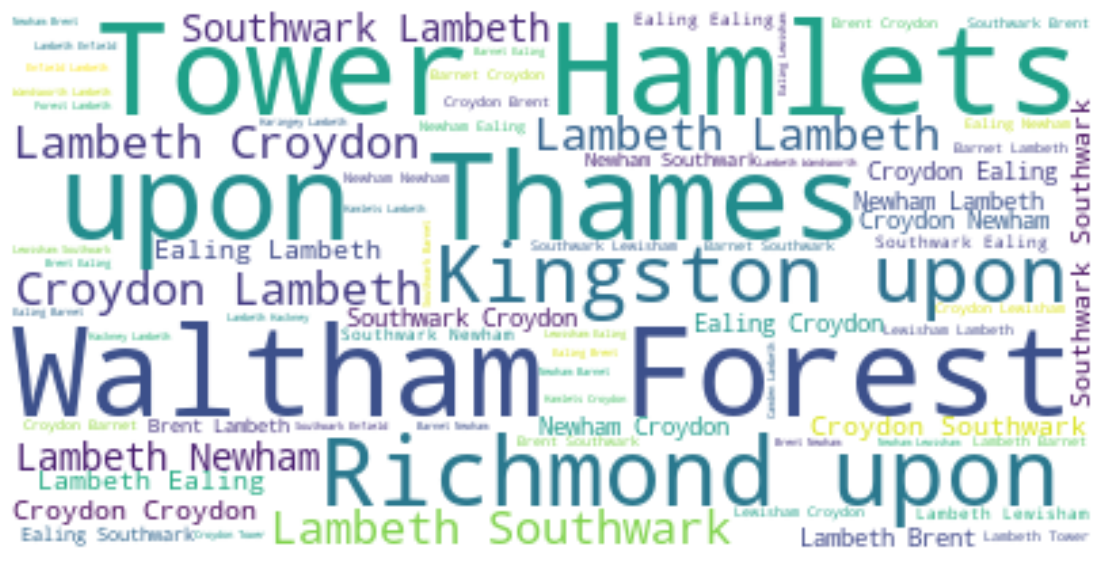

In [49]:
wordcloud = WordCloud(background_color = 'white').generate(bor_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [50]:
#data from list to string untuk major_category

maj_string = ' '.join(df2['major_category'])
print(maj_string)

#print tidak terlihat karena data terlalu banyak

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



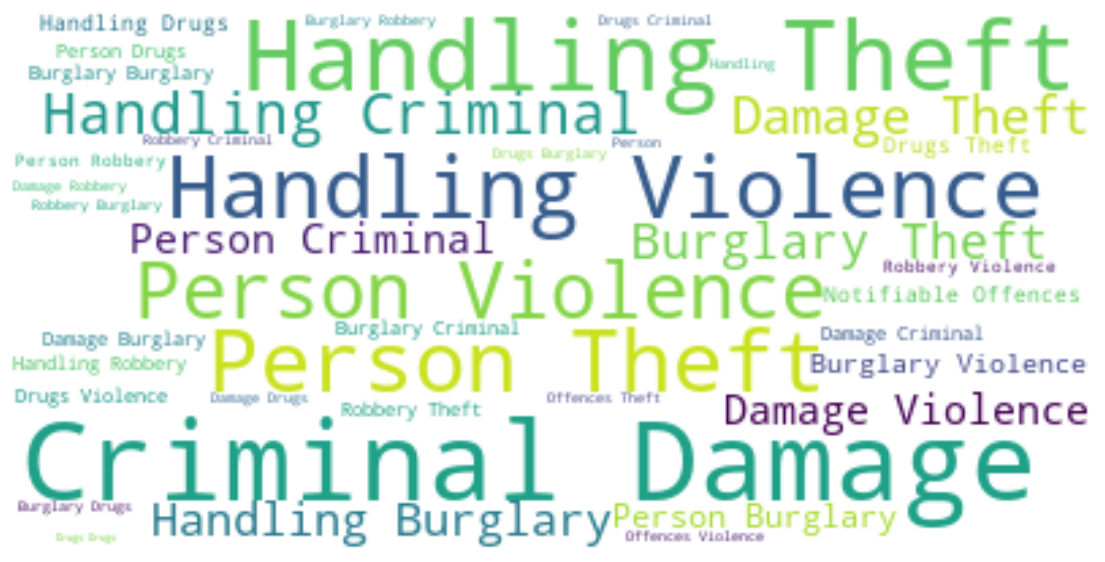

In [51]:
wordcloud = WordCloud(background_color = 'white').generate(maj_string)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Interpretasi :